# Data Manipulation
DESCRIPTION

SFO Public Department, referred to as SFO, has captured the salary data of all its employees for the years 2011-2014. Now in 2018, the organization is facing some financial crisis. As a first step, HR wants to rationalize employee cost to save payroll budget. You have to perform data manipulation and answer the questions below:

1. How much total salary cost has increased from year 2011 to 2014?
2. Who was the top-earning employee across all the years?


Objective: Perform data manipulation and visualization techniques.


In [1]:
# Import Required libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import the dataset
df = pd.read_csv('Salaries.csv', low_memory=False)

In [3]:
# Look at the dataset
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.shape

(148648, 13)

In [5]:
df.isna().all()

Id                  False
EmployeeName        False
JobTitle            False
BasePay             False
OvertimePay         False
OtherPay            False
Benefits            False
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status              False
dtype: bool

In [6]:
df.isna().any()

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay         False
OtherPay            False
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

In [7]:
df['TotalPay'] == df['TotalPayBenefits']

0         True
1         True
2         True
3         True
4         True
          ... 
148643    True
148644    True
148645    True
148646    True
148647    True
Length: 148648, dtype: bool

In [8]:
mean_year = df.groupby(['Year']).mean()['TotalPayBenefits']

In [9]:
mean_year

Year
2011     71743.819645
2012    100551.886807
2013    101440.519714
2014    100261.438668
Name: TotalPayBenefits, dtype: float64

In [10]:
top_earning_employee = df.groupby(['EmployeeName']).sum()['TotalPayBenefits']

In [11]:
top_earning_employee.sort_values(ascending=False, axis=0).head()

EmployeeName
Kevin Lee       1778487.17
Steven Lee      1706550.76
William Wong    1459954.17
Stanley Lee     1457279.68
Richard Lee     1268668.84
Name: TotalPayBenefits, dtype: float64

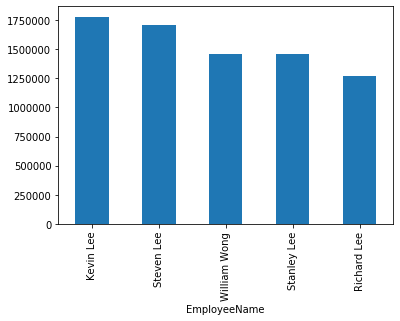

In [12]:
top_earning_employee.sort_values(ascending=False, axis=0).head().plot(kind='bar')
plt.show()